# Inductive bias

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import sys 
from importlib import reload
sys.path.append("../")
import E1_Functions as func

# Define a discrete color palette with a specified number of colors
#sns.set_palette(sns.color_palette("muted", n_colors=10))  # or use another color map and adjust `n_colors`
custom_palette = ["#FFB347", "#779ECB", "#77DD77", "#FF6961", "#CB99C9", "#FDFD96", "#AEC6CF"]
costum_palette_pairs = ['#ffb347', '#ffcc84', '#ffe6c2', 
                        '#779ecb', '#a4bedc', '#d2dfee', 
                        '#77dd77', '#a4e8a4', '#d2f4d2', 
                        '#ff6961', '#ff9b96', '#ffcdca', 
                        '#cb99c9', '#dcbbdb', '#eedded', 
                        '#fdfd96', '#fefeb9', '#fefedc',
                        '#aec6cf', '#c9d9df', '#e4ecef']

sns.set_palette(custom_palette)
colors = sns.color_palette()
colors_pairs = sns.color_palette(costum_palette_pairs) #("tab20c")

# set title font size
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Enable LaTeX font rendering
#plt.rcParams.update({
#    "text.usetex": True,            # Use LaTeX for all text
#    "font.family": "serif",         # Set the font family to serif (LaTeX default)
#    "font.serif": ["Computer Modern"]  # Use Computer Modern font (LaTeX default font)
#})


In [7]:
save_results = False
save_plots = False

In [8]:
reload(func);

# Example

OLD:
- Dataset consists of 3 num_samples x [x, y] points. 
- The number of training samples i train_points, the number for validation and testing is 100 each. 
- The data is generated from a sine function with some noise. 
- The task is to train a model to predict the sine function.

Questions:
- Should validation and testing be done on the same data? Does not make a difference, since it is generated from the same distribution.
- Should validation and testing be done on the sine function without noise? 

NEW:
- Dataset consists of num_train x [x, y] points for training.
- Validation and testing are identical and is the sine function without noise.

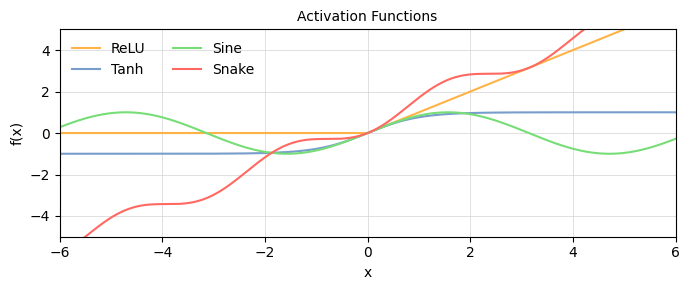

In [9]:
# plot a ReLU and Sine activation function

x = np.linspace(-2*np.pi, 2*np.pi, 1000)
relu = np.maximum(x, 0)
sine = np.sin(x)
tanh = np.tanh(x)
snake = x+np.sin(x)**2

plt.figure(figsize=(7, 3))
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
plt.plot(x, relu, label='ReLU', color=colors[0])
plt.plot(x, tanh, label='Tanh', color=colors[1])
plt.plot(x, sine, label='Sine', color=colors[2])
plt.plot(x, snake, label='Snake', color=colors[3])
plt.title('Activation Functions')
plt.legend(loc='upper left', frameon=False, ncols=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-2*np.pi, 2*np.pi)
plt.xlim(-6, 6)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

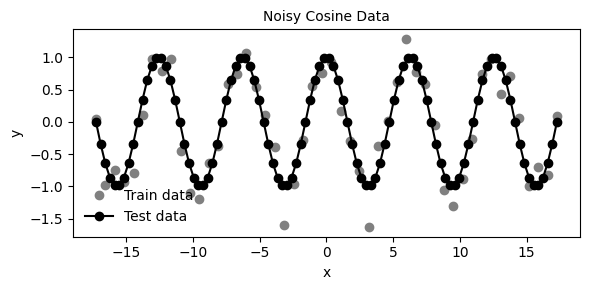

In [11]:
# GENERATE DATA
reload(func);

# Parameters for sine wave dataset
num_points = 50 #40 #50 #100
noise_std = 0.3

n_waves = 5.5 #5.5

# Generate data
train_x_array, train_y_array, test_x_array, test_y_array = func.generate_data(num_points, noise_std, n_waves, shifted=False)

# Plot an example sample
func.plot_data_example(train_x_array, train_y_array, test_x_array, test_y_array)

In [106]:
reload(func);

In [127]:
# TRAIN MODEL
input_size, hidden_sizes, output_size = 1, [64, 64], 1
batch_size = 25
print_every = 500
lr = 0.01

# Define model parameters
num_points = 50
num_epochs = 100 #50  #100


# Data
train_x_array, train_y_array, test_x_array, test_y_array = func.generate_data(num_points, noise_std, n_waves, shifted=False)

# Convert data to tensors and create dataloaders
train_x, train_y, test_x, test_y = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

###### MLP ######
ReLuMLP = func.ReLUMLP(input_size, hidden_sizes, output_size)
model_ReLUMLP, train_losses_MLP, val_losses_MLP = func.train_model(ReLuMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)


###### SineMLP ######
SineMLP = func.SineMLP(input_size, hidden_sizes, output_size)
model_SineMLP, train_losses_SineMLP, val_losses_SineMLP = func.train_model(SineMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)


###### TanhMLP ######
TanhMLP = func.TanhMLP(input_size, hidden_sizes, output_size)
model_TanhMLP, train_losses_TanhMLP, val_losses_TanhMLP = func.train_model(TanhMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

###### SnakeMLP ######
SnakeMLP = func.SnakeMLP(input_size, hidden_sizes, output_size)
model_SnakeMLP, train_losses_SnakeMLP, val_losses_SnakeMLP = func.train_model(SnakeMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

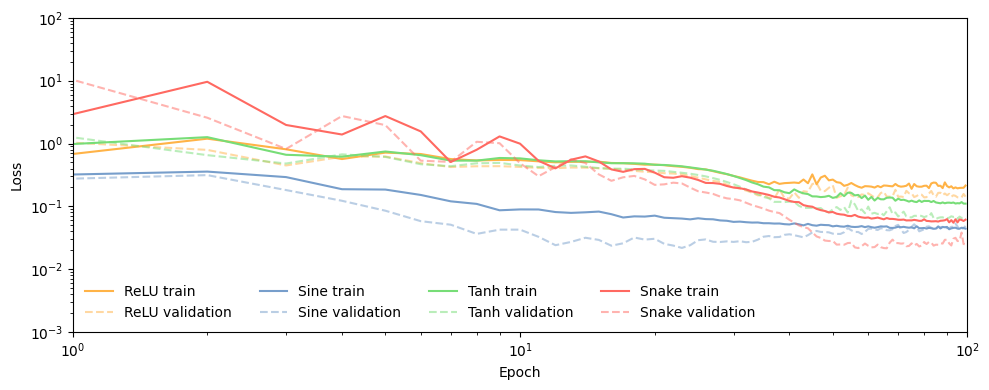

In [128]:
# Plot losses
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.plot(train_losses_MLP, label='ReLU train', color=colors[0])
ax.plot(val_losses_MLP, label='ReLU validation', ls = '--', color=colors[0], alpha=0.5)

ax.plot(train_losses_SineMLP, label='Sine train', color=colors[1])
ax.plot(val_losses_SineMLP, label='Sine validation', ls = '--', color=colors[1], alpha=0.5)

ax.plot(train_losses_TanhMLP, label='Tanh train', color=colors[2])
ax.plot(val_losses_TanhMLP, label='Tanh validation', ls = '--', color=colors[2], alpha=0.5)

ax.plot(train_losses_SnakeMLP, label='Snake train', color=colors[3])
ax.plot(val_losses_SnakeMLP, label='Snake validation', ls = '--', color=colors[3], alpha=0.5)

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower left', frameon=False, ncols=4)
ax.set_xlim(1, num_epochs)
ax.set_ylim(1e-3, 1e2)
plt.tight_layout()
#func.plot_losses(train_losses, val_losses, 'MLP')

(-1.5, 1.5)

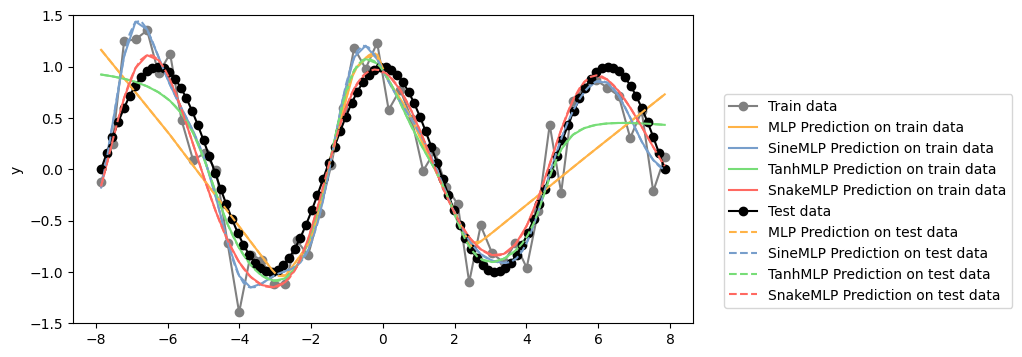

In [129]:
# plot results
from matplotlib.gridspec import GridSpec

model_ReLUMLP.eval()
model_SineMLP.eval()
model_TanhMLP.eval()
model_SnakeMLP.eval()

# Plot predictions
with torch.no_grad():
    train_pred_ReLUMLP = model_ReLUMLP(train_x).numpy().squeeze()
    test_pred_ReLUMLP = model_ReLUMLP(test_x).numpy().squeeze()

    train_pred_SineMLP = model_SineMLP(train_x).numpy().squeeze()
    test_pred_SineMLP = model_SineMLP(test_x).numpy().squeeze()

    train_pred_TanhMLP = model_TanhMLP(train_x).numpy().squeeze()
    test_pred_TanhMLP = model_TanhMLP(test_x).numpy().squeeze()

    train_pred_SnakeMLP = model_SnakeMLP(train_x).numpy().squeeze()
    test_pred_SnakeMLP = model_SnakeMLP(test_x).numpy().squeeze()


# Create a figure and specify GridSpec
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4)) #, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

ax1.plot(train_x_array, train_y_array, label='Train data', color='grey', marker='o') #, ls='-')
ax1.plot(train_x_array, train_pred_ReLUMLP, label='MLP Prediction on train data', color=colors[0])
ax1.plot(train_x_array, train_pred_SineMLP, label='SineMLP Prediction on train data', color=colors[1])
ax1.plot(train_x_array, train_pred_TanhMLP, label='TanhMLP Prediction on train data', color=colors[2])
ax1.plot(train_x_array, train_pred_SnakeMLP, label='SnakeMLP Prediction on train data', color=colors[3])


ax1.plot(test_x_array, test_y_array, label='Test data', color='black', marker='o') #, ls='-')
ax1.plot(test_x_array, test_pred_ReLUMLP, label='MLP Prediction on test data', color=colors[0], ls='--')
ax1.plot(test_x_array, test_pred_SineMLP, label='SineMLP Prediction on test data', color=colors[1], ls='--')
ax1.plot(test_x_array, test_pred_TanhMLP, label='TanhMLP Prediction on test data', color=colors[2], ls='--')
ax1.plot(test_x_array, test_pred_SnakeMLP, label='SnakeMLP Prediction on test data', color=colors[3], ls='--')



ax1.set_ylabel('y')
ax1.legend(loc = (1.05, 0.05))
ax1.set_ylim(-1.5, 1.5)

In [ ]:
# EVALUATE MODEL
#loss_mean = func.evaluate_model(model, test_x, test_y)
#print(f"Test Loss: {loss_mean:.4f}")
#func.plot_predictions(model, train_x, train_y, test_x, test_y, 'MLP')

# Testing test loss vs. different parameters

In [130]:
# Parameters fixed unless otherwise specified
num_points = 50
noise_std = 0.3
n_waves = 5.5
batch_size = 25
input_size = 1
hidden_sizes = [64, 64]
output_size = 1

# Test loss vs. number of epochs

In [139]:
# Define variable model parameters
num_epochs_list = [2, 4, 6, 10, 15, 20, 30, 40, 50, 100, 500, 1000, 5000]

In [ ]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_epochs = []

for i in tqdm(range(10), desc="Outer Loop"):
    # Generate train data
    train_x_array, train_y_array, _, _ = func.generate_data(num_points, noise_std, n_waves, shifted=False)
    train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
    train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)
    
    
    # Loop over different epoch settings
    for epoch in num_epochs_list:
        # Test loss vs. epochs for ReLUMLP and SineMLP and TanhMLP
        for model_type, model_class in [("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]:
            model = model_class(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=epoch)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. epochs
            results_test_loss_vs_epochs.append({
                "Metric_Type": "Test_Loss_vs_Epochs",
                "Model": model_type,
                "Num_points": num_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": epoch,
                "Hidden_Layers": len(hidden_sizes),
                "Nodes_Per_Layer": hidden_sizes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_epochs = pd.DataFrame(results_test_loss_vs_epochs)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.5215, Validation Loss: 0.3662
Epoch [100/100], Train Loss: 0.0778, Validation Loss: 0.0265
Epoch [100/100], Train Loss: 0.5158, Validation Loss: 0.3708
Epoch [100/100], Train Loss: 0.1890, Validation Loss: 0.1588
Epoch [100/500], Train Loss: 0.5067, Validation Loss: 0.3414
Epoch [200/500], Train Loss: 0.4370, Validation Loss: 0.2594
Epoch [300/500], Train Loss: 0.4051, Validation Loss: 0.1833
Epoch [400/500], Train Loss: 0.3934, Validation Loss: 0.1434
Epoch [500/500], Train Loss: 0.3800, Validation Loss: 0.1473
Epoch [100/500], Train Loss: 0.0808, Validation Loss: 0.0262
Epoch [200/500], Train Loss: 0.0550, Validation Loss: 0.0542
Epoch [300/500], Train Loss: 0.0289, Validation Loss: 0.0699
Epoch [400/500], Train Loss: 0.0131, Validation Loss: 0.0873
Epoch [500/500], Train Loss: 0.0044, Validation Loss: 0.1018
Epoch [100/500], Train Loss: 0.5065, Validation Loss: 0.3638
Epoch [200/500], Train Loss: 0.4810, Validation Loss: 0.3207
Epoch [300/500], Train L

Outer Loop:  10%|█         | 1/10 [00:33<05:02, 33.56s/it]

Epoch [5000/5000], Train Loss: 0.0212, Validation Loss: 0.1074
Epoch [100/100], Train Loss: 0.5192, Validation Loss: 0.4120
Epoch [100/100], Train Loss: 0.0392, Validation Loss: 0.0158
Epoch [100/100], Train Loss: 0.4818, Validation Loss: 0.3451
Epoch [100/100], Train Loss: 0.1253, Validation Loss: 0.1392
Epoch [100/500], Train Loss: 0.5177, Validation Loss: 0.3778
Epoch [200/500], Train Loss: 0.4564, Validation Loss: 0.3025
Epoch [300/500], Train Loss: 0.4065, Validation Loss: 0.2120
Epoch [400/500], Train Loss: 0.3809, Validation Loss: 0.1710
Epoch [500/500], Train Loss: 0.3703, Validation Loss: 0.1390
Epoch [100/500], Train Loss: 0.0444, Validation Loss: 0.0162
Epoch [200/500], Train Loss: 0.0269, Validation Loss: 0.0319
Epoch [300/500], Train Loss: 0.0199, Validation Loss: 0.0377
Epoch [400/500], Train Loss: 0.0085, Validation Loss: 0.0484
Epoch [500/500], Train Loss: 0.0013, Validation Loss: 0.0539
Epoch [100/500], Train Loss: 0.4660, Validation Loss: 0.3257
Epoch [200/500], Train

Outer Loop:  20%|██        | 2/10 [01:02<04:08, 31.03s/it]

Epoch [4900/5000], Train Loss: 0.0012, Validation Loss: 0.0585
Epoch [5000/5000], Train Loss: 0.0021, Validation Loss: 0.0607
Epoch [100/100], Train Loss: 0.5569, Validation Loss: 0.4293
Epoch [100/100], Train Loss: 0.0537, Validation Loss: 0.0842
Epoch [100/100], Train Loss: 0.4970, Validation Loss: 0.3579
Epoch [100/100], Train Loss: 0.0794, Validation Loss: 0.1275
Epoch [100/500], Train Loss: 0.5260, Validation Loss: 0.3787
Epoch [200/500], Train Loss: 0.4596, Validation Loss: 0.2809
Epoch [300/500], Train Loss: 0.4149, Validation Loss: 0.1818
Epoch [400/500], Train Loss: 0.3895, Validation Loss: 0.1360
Epoch [500/500], Train Loss: 0.3785, Validation Loss: 0.1241
Epoch [100/500], Train Loss: 0.0612, Validation Loss: 0.0714
Epoch [200/500], Train Loss: 0.0499, Validation Loss: 0.1051
Epoch [300/500], Train Loss: 0.0455, Validation Loss: 0.1117
Epoch [400/500], Train Loss: 0.0415, Validation Loss: 0.1171
Epoch [500/500], Train Loss: 0.0340, Validation Loss: 0.1241
Epoch [100/500], Tra

Outer Loop:  30%|███       | 3/10 [01:31<03:28, 29.77s/it]

Epoch [5000/5000], Train Loss: 0.0196, Validation Loss: 0.1637
Epoch [100/100], Train Loss: 0.5733, Validation Loss: 0.4087
Epoch [100/100], Train Loss: 0.0512, Validation Loss: 0.0304
Epoch [100/100], Train Loss: 0.5396, Validation Loss: 0.3520
Epoch [100/100], Train Loss: 0.1362, Validation Loss: 0.0750
Epoch [100/500], Train Loss: 0.5453, Validation Loss: 0.3509
Epoch [200/500], Train Loss: 0.4813, Validation Loss: 0.2378
Epoch [300/500], Train Loss: 0.4369, Validation Loss: 0.1587
Epoch [400/500], Train Loss: 0.4254, Validation Loss: 0.1245
Epoch [500/500], Train Loss: 0.4113, Validation Loss: 0.1051
Epoch [100/500], Train Loss: 0.0572, Validation Loss: 0.0263
Epoch [200/500], Train Loss: 0.0419, Validation Loss: 0.0422
Epoch [300/500], Train Loss: 0.0278, Validation Loss: 0.0558
Epoch [400/500], Train Loss: 0.0093, Validation Loss: 0.0792
Epoch [500/500], Train Loss: 0.0032, Validation Loss: 0.0839
Epoch [100/500], Train Loss: 0.5476, Validation Loss: 0.3599
Epoch [200/500], Train

Outer Loop:  40%|████      | 4/10 [01:58<02:54, 29.01s/it]

Epoch [5000/5000], Train Loss: 0.0028, Validation Loss: 0.0960
Epoch [100/100], Train Loss: 0.6105, Validation Loss: 0.4090
Epoch [100/100], Train Loss: 0.0320, Validation Loss: 0.0087
Epoch [100/100], Train Loss: 0.5970, Validation Loss: 0.3973
Epoch [100/100], Train Loss: 0.0914, Validation Loss: 0.1329
Epoch [100/500], Train Loss: 0.5806, Validation Loss: 0.3742
Epoch [200/500], Train Loss: 0.5453, Validation Loss: 0.2289
Epoch [300/500], Train Loss: 0.4855, Validation Loss: 0.1451
Epoch [400/500], Train Loss: 0.4893, Validation Loss: 0.1226
Epoch [500/500], Train Loss: 0.4770, Validation Loss: 0.1094
Epoch [100/500], Train Loss: 0.0378, Validation Loss: 0.0044
Epoch [200/500], Train Loss: 0.0168, Validation Loss: 0.0363
Epoch [300/500], Train Loss: 0.0133, Validation Loss: 0.0442
Epoch [400/500], Train Loss: 0.0117, Validation Loss: 0.0443
Epoch [500/500], Train Loss: 0.0084, Validation Loss: 0.0447
Epoch [100/500], Train Loss: 0.5940, Validation Loss: 0.3883
Epoch [200/500], Train

Outer Loop:  50%|█████     | 5/10 [02:26<02:23, 28.67s/it]

Epoch [4900/5000], Train Loss: 0.0022, Validation Loss: 0.0532
Epoch [5000/5000], Train Loss: 0.0101, Validation Loss: 0.0489
Epoch [100/100], Train Loss: 0.4675, Validation Loss: 0.3892
Epoch [100/100], Train Loss: 0.0409, Validation Loss: 0.0266
Epoch [100/100], Train Loss: 0.4896, Validation Loss: 0.4434
Epoch [100/100], Train Loss: 0.0736, Validation Loss: 0.0676
Epoch [100/500], Train Loss: 0.4891, Validation Loss: 0.4175
Epoch [200/500], Train Loss: 0.4558, Validation Loss: 0.3267
Epoch [300/500], Train Loss: 0.4361, Validation Loss: 0.2771
Epoch [400/500], Train Loss: 0.4093, Validation Loss: 0.2054
Epoch [500/500], Train Loss: 0.3888, Validation Loss: 0.1798
Epoch [100/500], Train Loss: 0.0449, Validation Loss: 0.0280
Epoch [200/500], Train Loss: 0.0182, Validation Loss: 0.0503
Epoch [300/500], Train Loss: 0.0128, Validation Loss: 0.0513
Epoch [400/500], Train Loss: 0.0108, Validation Loss: 0.0492
Epoch [500/500], Train Loss: 0.0080, Validation Loss: 0.0510
Epoch [100/500], Tra

Outer Loop:  60%|██████    | 6/10 [02:54<01:53, 28.37s/it]

Epoch [4900/5000], Train Loss: 0.0179, Validation Loss: 0.0462
Epoch [5000/5000], Train Loss: 0.0011, Validation Loss: 0.0544
Epoch [100/100], Train Loss: 0.5622, Validation Loss: 0.4242
Epoch [100/100], Train Loss: 0.0720, Validation Loss: 0.0543
Epoch [100/100], Train Loss: 0.5412, Validation Loss: 0.3730
Epoch [100/100], Train Loss: 0.1044, Validation Loss: 0.1669
Epoch [100/500], Train Loss: 0.5416, Validation Loss: 0.3905
Epoch [200/500], Train Loss: 0.4911, Validation Loss: 0.3115
Epoch [300/500], Train Loss: 0.4700, Validation Loss: 0.2631
Epoch [400/500], Train Loss: 0.4699, Validation Loss: 0.2024
Epoch [500/500], Train Loss: 0.4273, Validation Loss: 0.1931
Epoch [100/500], Train Loss: 0.0633, Validation Loss: 0.0548
Epoch [200/500], Train Loss: 0.0277, Validation Loss: 0.1108
Epoch [300/500], Train Loss: 0.0086, Validation Loss: 0.1333
Epoch [400/500], Train Loss: 0.0047, Validation Loss: 0.1448
Epoch [500/500], Train Loss: 0.0039, Validation Loss: 0.1512
Epoch [100/500], Tra

Outer Loop:  70%|███████   | 7/10 [03:22<01:24, 28.17s/it]

Epoch [5000/5000], Train Loss: 0.0011, Validation Loss: 0.1329
Epoch [100/100], Train Loss: 0.4866, Validation Loss: 0.3621
Epoch [100/100], Train Loss: 0.0666, Validation Loss: 0.0191
Epoch [100/100], Train Loss: 0.4878, Validation Loss: 0.3380
Epoch [100/100], Train Loss: 0.1545, Validation Loss: 0.1965
Epoch [100/500], Train Loss: 0.4820, Validation Loss: 0.3327
Epoch [200/500], Train Loss: 0.4516, Validation Loss: 0.2714
Epoch [300/500], Train Loss: 0.4537, Validation Loss: 0.2541
Epoch [400/500], Train Loss: 0.4434, Validation Loss: 0.2203
Epoch [500/500], Train Loss: 0.4230, Validation Loss: 0.1988
Epoch [100/500], Train Loss: 0.0681, Validation Loss: 0.0185
Epoch [200/500], Train Loss: 0.0542, Validation Loss: 0.0250
Epoch [300/500], Train Loss: 0.0431, Validation Loss: 0.0347
Epoch [400/500], Train Loss: 0.0217, Validation Loss: 0.0465
Epoch [500/500], Train Loss: 0.0090, Validation Loss: 0.0665
Epoch [100/500], Train Loss: 0.4852, Validation Loss: 0.3474
Epoch [200/500], Train

Outer Loop:  80%|████████  | 8/10 [03:50<00:56, 28.17s/it]

Epoch [4900/5000], Train Loss: 0.0052, Validation Loss: 0.0834
Epoch [5000/5000], Train Loss: 0.0010, Validation Loss: 0.0807
Epoch [100/100], Train Loss: 0.5121, Validation Loss: 0.3480
Epoch [100/100], Train Loss: 0.0708, Validation Loss: 0.0261
Epoch [100/100], Train Loss: 0.4821, Validation Loss: 0.2954
Epoch [100/100], Train Loss: 0.1003, Validation Loss: 0.0620
Epoch [100/500], Train Loss: 0.5115, Validation Loss: 0.3723
Epoch [200/500], Train Loss: 0.4531, Validation Loss: 0.2527
Epoch [300/500], Train Loss: 0.4190, Validation Loss: 0.1979
Epoch [400/500], Train Loss: 0.4018, Validation Loss: 0.1637
Epoch [500/500], Train Loss: 0.4159, Validation Loss: 0.1238
Epoch [100/500], Train Loss: 0.0717, Validation Loss: 0.0314
Epoch [200/500], Train Loss: 0.0616, Validation Loss: 0.0345
Epoch [300/500], Train Loss: 0.0455, Validation Loss: 0.0454
Epoch [400/500], Train Loss: 0.0240, Validation Loss: 0.0618
Epoch [500/500], Train Loss: 0.0141, Validation Loss: 0.0662
Epoch [100/500], Tra

Outer Loop:  90%|█████████ | 9/10 [04:18<00:28, 28.16s/it]

Epoch [4900/5000], Train Loss: 0.0023, Validation Loss: 0.0727
Epoch [5000/5000], Train Loss: 0.0040, Validation Loss: 0.0718
Epoch [100/100], Train Loss: 0.4546, Validation Loss: 0.3287
Epoch [100/100], Train Loss: 0.0408, Validation Loss: 0.0360
Epoch [100/100], Train Loss: 0.4837, Validation Loss: 0.3869
Epoch [100/100], Train Loss: 0.0818, Validation Loss: 0.0789
Epoch [100/500], Train Loss: 0.4714, Validation Loss: 0.3773
Epoch [200/500], Train Loss: 0.4300, Validation Loss: 0.2860
Epoch [300/500], Train Loss: 0.3936, Validation Loss: 0.1790
Epoch [400/500], Train Loss: 0.3835, Validation Loss: 0.1218
Epoch [500/500], Train Loss: 0.3662, Validation Loss: 0.1075
Epoch [100/500], Train Loss: 0.0284, Validation Loss: 0.0408
Epoch [200/500], Train Loss: 0.0209, Validation Loss: 0.0580
Epoch [300/500], Train Loss: 0.0166, Validation Loss: 0.0632
Epoch [400/500], Train Loss: 0.0135, Validation Loss: 0.0649
Epoch [500/500], Train Loss: 0.0100, Validation Loss: 0.0679
Epoch [100/500], Tra

Outer Loop: 100%|██████████| 10/10 [04:48<00:00, 28.85s/it]

Epoch [5000/5000], Train Loss: 0.0022, Validation Loss: 0.0830


In [141]:
reload(func);

In [142]:
save_results = False

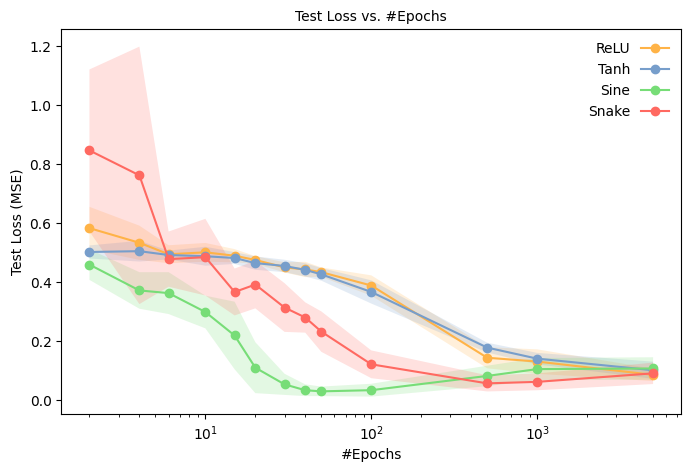

In [164]:
#results_test_loss_vs_epochs = pd.read_csv('SineResults/results_test_loss_vs_epochs.csv')

# Plot test loss vs. epochs
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_epochs, 'Epochs', '#Epochs', log=True)

if save_plots:
    plt.savefig('SinePlots/test_loss_vs_epochs_extendended.png', dpi=300)

#ax.hlines(0.24, 0, 5000, linestyles='dashed', label='Baseline Test Loss', color='grey')

# save pandas DataFrame to csv
if save_results:
    results_test_loss_vs_epochs.to_csv('SineResults/results_test_loss_vs_epochs_all.csv')

# Test loss vs. number of training examples

In [144]:
# Define variable model parameters
num_train_points_list = [5, 10, 50, 100, 500, 1000, 5000, 10000, 20000] #[2, 3, 4, 6, 8, 10, 20, 50, 100, 150]

In [145]:
num_epochs

100

In [152]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_num_train_points = []

for _ in tqdm(range(10), desc="Outer Loop"):
    # Train data is generated for each iteration since it is dependent on the parameter num_samples

    # Loop over different number of samples
    for num_train_points in num_train_points_list:
        # Generate train data
        train_x_array, train_y_array, _, _ = func.generate_data(num_train_points, noise_std, n_waves, shifted=False)
        train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
        train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)
        

        # Test loss vs. number of samples for both MLP and SineMLP
        for i, (model_type, model_class) in enumerate([("ReLUMLP", func.ReLUMLP), ("SineMLP", func.SineMLP), ("TanhMLP", func.TanhMLP), ("SnakeMLP", func.SnakeMLP)]):
            model = model_class(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=num_epochs)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. number of samples
            results_test_loss_vs_num_train_points.append({
                "Metric_Type": "Test_Loss_vs_Num_Samples",
                "Model": model_type,
                "Num_points": num_train_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": num_epochs,
                "Hidden_Layers": len(hidden_sizes),
                "Nodes_Per_Layer": hidden_sizes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_num_train_points = pd.DataFrame(results_test_loss_vs_num_train_points)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.0426, Validation Loss: 0.6243
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.6528
Epoch [100/100], Train Loss: 0.0004, Validation Loss: 0.8739
Epoch [100/100], Train Loss: 0.0336, Validation Loss: 0.7786
Epoch [100/100], Train Loss: 0.3538, Validation Loss: 0.4990
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.4388
Epoch [100/100], Train Loss: 0.2851, Validation Loss: 1.0635
Epoch [100/100], Train Loss: 0.0007, Validation Loss: 0.6566
Epoch [100/100], Train Loss: 0.4235, Validation Loss: 0.3890
Epoch [100/100], Train Loss: 0.0465, Validation Loss: 0.0210
Epoch [100/100], Train Loss: 0.3997, Validation Loss: 0.3836
Epoch [100/100], Train Loss: 0.0532, Validation Loss: 0.0606
Epoch [100/100], Train Loss: 0.6029, Validation Loss: 0.3332
Epoch [100/100], Train Loss: 0.0866, Validation Loss: 0.0229
Epoch [100/100], Train Loss: 0.6129, Validation Loss: 0.3572
Epoch [100/100], Train Loss: 0.1383, Validation Loss: 0.1159
Epoch [100/100], Train L

Outer Loop:  10%|█         | 1/10 [04:19<38:57, 259.78s/it]

Epoch [100/100], Train Loss: 0.0940, Validation Loss: 0.0012
Epoch [100/100], Train Loss: 0.0363, Validation Loss: 0.6680
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.4404
Epoch [100/100], Train Loss: 0.0001, Validation Loss: 0.8872
Epoch [100/100], Train Loss: 0.0042, Validation Loss: 0.7192
Epoch [100/100], Train Loss: 0.3376, Validation Loss: 0.5602
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.3790
Epoch [100/100], Train Loss: 0.2974, Validation Loss: 1.1747
Epoch [100/100], Train Loss: 0.0041, Validation Loss: 0.4431
Epoch [100/100], Train Loss: 0.4834, Validation Loss: 0.4017
Epoch [100/100], Train Loss: 0.0884, Validation Loss: 0.0142
Epoch [100/100], Train Loss: 0.4865, Validation Loss: 0.3898
Epoch [100/100], Train Loss: 0.0949, Validation Loss: 0.0623
Epoch [100/100], Train Loss: 0.5421, Validation Loss: 0.3287
Epoch [100/100], Train Loss: 0.0603, Validation Loss: 0.0108
Epoch [100/100], Train Loss: 0.5174, Validation Loss: 0.2925
Epoch [100/100], Train L

Outer Loop:  20%|██        | 2/10 [08:39<34:39, 259.91s/it]

Epoch [100/100], Train Loss: 0.0936, Validation Loss: 0.0008
Epoch [100/100], Train Loss: 0.0950, Validation Loss: 0.6698
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.7996
Epoch [100/100], Train Loss: 0.0619, Validation Loss: 0.4820
Epoch [100/100], Train Loss: 0.0009, Validation Loss: 0.6482
Epoch [100/100], Train Loss: 0.5917, Validation Loss: 0.5154
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.4981
Epoch [100/100], Train Loss: 0.5626, Validation Loss: 0.6603
Epoch [100/100], Train Loss: 0.0016, Validation Loss: 0.5624
Epoch [100/100], Train Loss: 0.5576, Validation Loss: 0.4010
Epoch [100/100], Train Loss: 0.0674, Validation Loss: 0.0147
Epoch [100/100], Train Loss: 0.5612, Validation Loss: 0.4003
Epoch [100/100], Train Loss: 0.1884, Validation Loss: 0.1897
Epoch [100/100], Train Loss: 0.5276, Validation Loss: 0.3705
Epoch [100/100], Train Loss: 0.0648, Validation Loss: 0.0147
Epoch [100/100], Train Loss: 0.5003, Validation Loss: 0.2898
Epoch [100/100], Train L

Outer Loop:  30%|███       | 3/10 [13:08<30:49, 264.15s/it]

Epoch [100/100], Train Loss: 0.0934, Validation Loss: 0.0028
Epoch [100/100], Train Loss: 0.3061, Validation Loss: 0.6008
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 1.3129
Epoch [100/100], Train Loss: 0.1901, Validation Loss: 0.8446
Epoch [100/100], Train Loss: 0.0019, Validation Loss: 1.0397
Epoch [100/100], Train Loss: 0.6536, Validation Loss: 0.4817
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 1.1454
Epoch [100/100], Train Loss: 0.6142, Validation Loss: 0.7823
Epoch [100/100], Train Loss: 0.0673, Validation Loss: 0.4141
Epoch [100/100], Train Loss: 0.5129, Validation Loss: 0.3891
Epoch [100/100], Train Loss: 0.0489, Validation Loss: 0.0363
Epoch [100/100], Train Loss: 0.4879, Validation Loss: 0.3607
Epoch [100/100], Train Loss: 0.0680, Validation Loss: 0.0883
Epoch [100/100], Train Loss: 0.5082, Validation Loss: 0.3460
Epoch [100/100], Train Loss: 0.0711, Validation Loss: 0.0107
Epoch [100/100], Train Loss: 0.4803, Validation Loss: 0.3027
Epoch [100/100], Train L

Outer Loop:  40%|████      | 4/10 [17:36<26:32, 265.44s/it]

Epoch [100/100], Train Loss: 0.0959, Validation Loss: 0.0035
Epoch [100/100], Train Loss: 0.0445, Validation Loss: 0.9356
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.8080
Epoch [100/100], Train Loss: 0.0102, Validation Loss: 1.8715
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.7030
Epoch [100/100], Train Loss: 0.4959, Validation Loss: 0.5542
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.4442
Epoch [100/100], Train Loss: 0.4232, Validation Loss: 1.2152
Epoch [100/100], Train Loss: 0.0265, Validation Loss: 0.3882
Epoch [100/100], Train Loss: 0.5325, Validation Loss: 0.3072
Epoch [100/100], Train Loss: 0.0350, Validation Loss: 0.0157
Epoch [100/100], Train Loss: 0.5240, Validation Loss: 0.2760
Epoch [100/100], Train Loss: 0.0817, Validation Loss: 0.0991
Epoch [100/100], Train Loss: 0.4370, Validation Loss: 0.2948
Epoch [100/100], Train Loss: 0.0516, Validation Loss: 0.0190
Epoch [100/100], Train Loss: 0.4615, Validation Loss: 0.3277
Epoch [100/100], Train L

Outer Loop:  50%|█████     | 5/10 [21:55<21:56, 263.31s/it]

Epoch [100/100], Train Loss: 0.0946, Validation Loss: 0.0015
Epoch [100/100], Train Loss: 0.1883, Validation Loss: 0.5617
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.7561
Epoch [100/100], Train Loss: 0.0013, Validation Loss: 0.9992
Epoch [100/100], Train Loss: 0.0012, Validation Loss: 0.8237
Epoch [100/100], Train Loss: 0.3448, Validation Loss: 0.4673
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.3913
Epoch [100/100], Train Loss: 0.3180, Validation Loss: 0.6536
Epoch [100/100], Train Loss: 0.0104, Validation Loss: 0.4152
Epoch [100/100], Train Loss: 0.4547, Validation Loss: 0.3331
Epoch [100/100], Train Loss: 0.0647, Validation Loss: 0.0144
Epoch [100/100], Train Loss: 0.4697, Validation Loss: 0.3657
Epoch [100/100], Train Loss: 0.0798, Validation Loss: 0.0629
Epoch [100/100], Train Loss: 0.3940, Validation Loss: 0.2635
Epoch [100/100], Train Loss: 0.0558, Validation Loss: 0.0174
Epoch [100/100], Train Loss: 0.4181, Validation Loss: 0.2971
Epoch [100/100], Train L

Outer Loop:  60%|██████    | 6/10 [26:12<17:24, 261.01s/it]

Epoch [100/100], Train Loss: 0.0963, Validation Loss: 0.0024
Epoch [100/100], Train Loss: 0.1049, Validation Loss: 0.7515
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.8938
Epoch [100/100], Train Loss: 0.0604, Validation Loss: 1.1621
Epoch [100/100], Train Loss: 0.1454, Validation Loss: 0.8929
Epoch [100/100], Train Loss: 0.3929, Validation Loss: 0.4929
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.7692
Epoch [100/100], Train Loss: 0.3151, Validation Loss: 1.2002
Epoch [100/100], Train Loss: 0.0361, Validation Loss: 0.4723
Epoch [100/100], Train Loss: 0.4818, Validation Loss: 0.3871
Epoch [100/100], Train Loss: 0.0406, Validation Loss: 0.0489
Epoch [100/100], Train Loss: 0.4686, Validation Loss: 0.3623
Epoch [100/100], Train Loss: 0.0616, Validation Loss: 0.0711
Epoch [100/100], Train Loss: 0.4576, Validation Loss: 0.2913
Epoch [100/100], Train Loss: 0.0900, Validation Loss: 0.0166
Epoch [100/100], Train Loss: 0.4984, Validation Loss: 0.3025
Epoch [100/100], Train L

Outer Loop:  70%|███████   | 7/10 [30:29<12:59, 259.77s/it]

Epoch [100/100], Train Loss: 0.0938, Validation Loss: 0.0009
Epoch [100/100], Train Loss: 0.0713, Validation Loss: 0.8129
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.6720
Epoch [100/100], Train Loss: 0.0084, Validation Loss: 1.8616
Epoch [100/100], Train Loss: 0.0004, Validation Loss: 0.7179
Epoch [100/100], Train Loss: 0.3945, Validation Loss: 0.4944
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.3815
Epoch [100/100], Train Loss: 0.3764, Validation Loss: 0.6111
Epoch [100/100], Train Loss: 0.0039, Validation Loss: 0.5776
Epoch [100/100], Train Loss: 0.5776, Validation Loss: 0.3448
Epoch [100/100], Train Loss: 0.0817, Validation Loss: 0.0352
Epoch [100/100], Train Loss: 0.5623, Validation Loss: 0.3366
Epoch [100/100], Train Loss: 0.1501, Validation Loss: 0.1010
Epoch [100/100], Train Loss: 0.4371, Validation Loss: 0.2861
Epoch [100/100], Train Loss: 0.0776, Validation Loss: 0.0175
Epoch [100/100], Train Loss: 0.4330, Validation Loss: 0.2843
Epoch [100/100], Train L

Outer Loop:  80%|████████  | 8/10 [34:57<08:44, 262.27s/it]

Epoch [100/100], Train Loss: 0.0940, Validation Loss: 0.0008
Epoch [100/100], Train Loss: 0.2158, Validation Loss: 0.6050
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 1.1356
Epoch [100/100], Train Loss: 0.0103, Validation Loss: 0.8444
Epoch [100/100], Train Loss: 0.0005, Validation Loss: 0.8268
Epoch [100/100], Train Loss: 0.4910, Validation Loss: 0.6200
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.6221
Epoch [100/100], Train Loss: 0.4279, Validation Loss: 1.1062
Epoch [100/100], Train Loss: 0.0112, Validation Loss: 0.3201
Epoch [100/100], Train Loss: 0.5017, Validation Loss: 0.4088
Epoch [100/100], Train Loss: 0.0639, Validation Loss: 0.0279
Epoch [100/100], Train Loss: 0.4921, Validation Loss: 0.3602
Epoch [100/100], Train Loss: 0.0623, Validation Loss: 0.0586
Epoch [100/100], Train Loss: 0.4291, Validation Loss: 0.2273
Epoch [100/100], Train Loss: 0.0792, Validation Loss: 0.0117
Epoch [100/100], Train Loss: 0.4589, Validation Loss: 0.2788
Epoch [100/100], Train L

Outer Loop:  90%|█████████ | 9/10 [39:18<04:22, 262.08s/it]

Epoch [100/100], Train Loss: 0.0947, Validation Loss: 0.0028
Epoch [100/100], Train Loss: 0.0411, Validation Loss: 0.7074
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.5778
Epoch [100/100], Train Loss: 0.0130, Validation Loss: 0.8811
Epoch [100/100], Train Loss: 0.0018, Validation Loss: 0.4524
Epoch [100/100], Train Loss: 0.5486, Validation Loss: 0.5265
Epoch [100/100], Train Loss: 0.0000, Validation Loss: 0.7481
Epoch [100/100], Train Loss: 0.4789, Validation Loss: 0.7496
Epoch [100/100], Train Loss: 0.0406, Validation Loss: 0.6287
Epoch [100/100], Train Loss: 0.4234, Validation Loss: 0.3566
Epoch [100/100], Train Loss: 0.0453, Validation Loss: 0.0344
Epoch [100/100], Train Loss: 0.4442, Validation Loss: 0.3710
Epoch [100/100], Train Loss: 0.0575, Validation Loss: 0.0992
Epoch [100/100], Train Loss: 0.4477, Validation Loss: 0.2311
Epoch [100/100], Train Loss: 0.0655, Validation Loss: 0.0219
Epoch [100/100], Train Loss: 0.4467, Validation Loss: 0.2310
Epoch [100/100], Train L

Outer Loop: 100%|██████████| 10/10 [43:40<00:00, 262.10s/it]

Epoch [100/100], Train Loss: 0.0957, Validation Loss: 0.0010


In [163]:
reload(func);

In [162]:
if save_results:
    results_test_loss_vs_num_train_points.to_csv('SineResults/results_test_loss_vs_num_samples.csv')

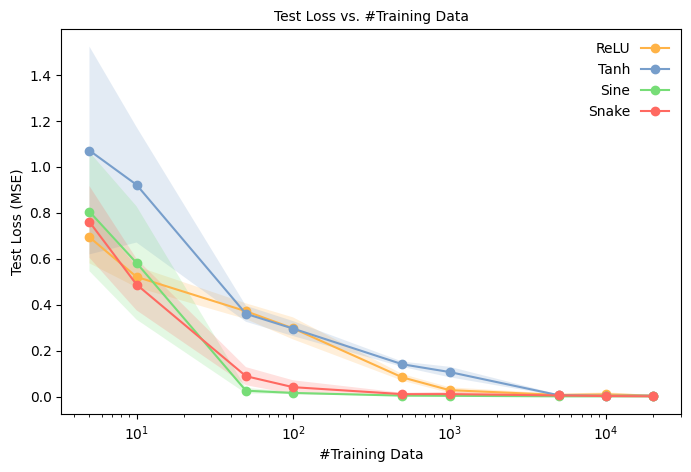

In [161]:
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_num_train_points, 'Num_points', '#Training Data', log=True)
if save_results:
    results_test_loss_vs_num_train_points.to_csv('SinePlots/results_test_loss_vs_num_train_points.csv')

# Test loss vs. number of hidden layers

In [ ]:
# Define variable model parameters
num_points = 50
num_epochs = 100
hidden_sizes_list = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64]]

In [ ]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_num_hidden_layers = []

for _ in tqdm(range(10), desc="Outer Loop"):
    # Generate train data
    train_x_array, train_y_array, _, _ = func.generate_data(num_points, noise_std, n_waves, decay=False)
    train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
    train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

    # Loop over different epoch settings
    for h_sizes in hidden_sizes_list:
        # Test loss vs. epochs for both MLP and SineMLP
        for model_type, model_class in [("MLP", func.MLP), ("SineMLP", func.SineMLP)]:
            model = model_class(input_size=input_size, hidden_sizes=h_sizes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=num_epochs)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. epochs
            results_test_loss_vs_num_hidden_layers.append({
                "Metric_Type": "Test_Loss_vs_Hidden_Layers",
                "Model": model_type,
                "Num_points": num_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": epoch,
                "Hidden_Layers": len(h_sizes),
                "Nodes_Per_Layer": h_sizes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_num_hidden_layers = pd.DataFrame(results_test_loss_vs_num_hidden_layers)

In [ ]:
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_num_hidden_layers, 'Hidden_Layers', '#Hidden Layers')

if save_plots:
    plt.savefig('SinePlots/test_loss_vs_hidden_layers.png', dpi=300)

if save_results:
    results_test_loss_vs_num_hidden_layers.to_csv('SineResults/results_test_loss_vs_num_hidden_layers.csv')

# Test loss vs. number of nodes in hidden layers

In [ ]:
# Define variable model parameters
num_points = 50
num_epochs = 100
num_nodes_list = [[2, 2], [4, 4], [8, 8], [16, 16], [32, 32], [64, 64], [128, 128]]

In [ ]:
# Initialize an empty list to collect rows for the DataFrame
results_test_loss_vs_num_nodes = []

for _ in tqdm(range(10), desc="Outer Loop"):
    # Generate train data
    train_x_array, train_y_array, _, _ = func.generate_data(num_points, noise_std, n_waves, decay=False)
    train_x, train_y, _, _ = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
    train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

    # Loop over different epoch settings
    for num_nodes in num_nodes_list:
        # Test loss vs. epochs for both MLP and SineMLP
        for model_type, model_class in [("MLP", func.MLP), ("SineMLP", func.SineMLP)]:
            model = model_class(input_size=input_size, hidden_sizes=num_nodes, output_size=output_size)  
            model, train_losses, val_losses = func.train_model(model, train_loader, test_x, test_y, num_epochs=num_epochs)
            loss_mean = func.evaluate_model(model, test_x, test_y)

            # Store results for test loss vs. epochs
            results_test_loss_vs_num_nodes.append({
                "Metric_Type": "Test_Loss_vs_Nodes_Per_Layer",
                "Model": model_type,
                "Num_points": num_points,
                "Noise_std": noise_std,
                "N_waves": n_waves,
                "Epochs": epoch,
                "Hidden_Layers": len(num_nodes),
                "Nodes_Per_Layer": num_nodes[0],
                "Batch_size": batch_size,
                "Train_Losses": train_losses,
                "Val_Losses": val_losses,
                "Test_Mean_Loss": loss_mean,
            })

# Convert the results list to a DataFrame
results_test_loss_vs_num_nodes = pd.DataFrame(results_test_loss_vs_num_nodes)

In [ ]:
fig, ax = func.plot_test_loss_vs_parameter(results_test_loss_vs_num_nodes, 'Nodes_Per_Layer', '#Nodes per Layer',log=True)

if save_plots:
    plt.savefig('SinePlots/test_loss_vs_nodes_per_layer.png', dpi=300)

if save_results:
    results_test_loss_vs_num_nodes.to_csv('SineResults/results_test_loss_vs_num_nodes.csv')

# Plot summary

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
ax = ax.flatten()

func.plot_test_loss_vs_parameter(results_test_loss_vs_epochs, 'Epochs', '#Epochs', ax=ax[0], log=True)
func.plot_test_loss_vs_parameter(results_test_loss_vs_num_train_points, 'Num_points', '#Training Data', ax=ax[1], log=True)
func.plot_test_loss_vs_parameter(results_test_loss_vs_num_nodes, 'Nodes_Per_Layer', '#Nodes per Layer', ax=ax[2], log=True)

ax[0].set_ylabel('Test Loss (MSE)')
fig.tight_layout()

if save_plots:
    plt.savefig('SinePlots/test_loss_vs_all_parameters.png', dpi=300)


# How much more efficient is the training process when using the sine activation function?

### MLP

In [ ]:
# GENERATE DATA

# Parameters for dataset for MLP
num_samples = 100
train_points = 100
noise_std = 0.2
n_waves = 5

# Generate data
df = func.generate_data(num_samples, train_points, noise_std, n_waves)

# Define model parameters
input_size, hidden_sizes, output_size = 1, [128, 128], 1
batch_size = 25
num_epochs = 60
print_every = 10

# Convert data to tensors and create dataloaders
train_x, train_y, val_x, val_y, test_x, test_y = func.convert_to_tensor(df)
train_loader, val_loader, test_loader = func.create_dataloader(train_x, train_y, val_x, val_y, test_x, test_y, batch_size=batch_size)

# Define and train model
MLP = func.MLP(input_size, hidden_sizes, output_size)
model, train_losses, val_losses = func.train_model(MLP, train_loader, val_loader, num_epochs=num_epochs, print_every=print_every)
func.plot_losses(train_losses, val_losses, 'MLP')

# EVALUATE MODEL
loss_mean, loss_std = func.evaluate_model(model, test_loader)
print(f"Test Loss: {loss_mean:.4f} +/- {loss_std:.4f}")
func.plot_predictions(model, df, 'MLP')

In [ ]:
# GENERATE DATA

# Parameters for dataset for SineMLP
num_samples = 20
train_points = 100
noise_std = 0.2
n_waves = 5

# Generate data
df = func.generate_data(num_samples, train_points, noise_std, n_waves)

# Define model parameters
input_size, hidden_sizes, output_size = 1, [128, 128], 1
batch_size = 25
num_epochs = 20
print_every = 10

# Convert data to tensors and create dataloaders
train_x, train_y, val_x, val_y, test_x, test_y = func.convert_to_tensor(df)
train_loader, val_loader, test_loader = func.create_dataloader(train_x, train_y, val_x, val_y, test_x, test_y, batch_size=batch_size)

# Define and train model
MLP = func.SineMLP(input_size, hidden_sizes, output_size)
model, train_losses, val_losses = func.train_model(MLP, train_loader, val_loader, num_epochs=num_epochs, print_every=print_every)
func.plot_losses(train_losses, val_losses, 'SineMLP')

# EVALUATE MODEL
loss_mean, loss_std = func.evaluate_model(model, test_loader)
print(f"Test Loss: {loss_mean:.4f} +/- {loss_std:.4f}")
func.plot_predictions(model, df, 'SineMLP')